In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv("emissions_high_granularity.csv")
df.head()

,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,0.9125,Million bbl/yr,0.338928,0.005404,0.001299,0.0,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
1,1963,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,1.8250,Million bbl/yr,0.677855,0.010808,0.002598,0.0,0.036508,0.001304,0.049914,0.727770,Abu Dhabi National Oil Company Annual Report 1...
2,1964,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,7.3000,Million bbl/yr,2.711422,0.043233,0.010392,0.0,0.146033,0.005215,0.199657,2.911079,Abu Dhabi National Oil Company Annual Report 1...
3,1965,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,10.9500,Million bbl/yr,4.067132,0.064849,0.015588,0.0,0.219049,0.007823,0.299486,4.366618,Abu Dhabi National Oil Company Annual Report 1...
4,1966,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,13.5050,Million bbl/yr,5.016130,0.079980,0.019225,0.0,0.270160,0.009649,0.369366,5.385495,Abu Dhabi National Oil Company Annual Report 1...


In [3]:
print(df.columns)



Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'source'],
      dtype='object')


In [4]:
df["commodity"].value_counts()

commodity
Oil & NGL              5446
Natural Gas            4816
Bituminous Coal        1392
Metallurgical Coal     1105
Lignite Coal           1008
Sub-Bituminous Coal     674
Thermal Coal            673
Anthracite Coal         368
Cement                  315
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15797 non-null  int64  
 1   parent_entity                       15797 non-null  object 
 2   parent_type                         15797 non-null  object 
 3   reporting_entity                    15797 non-null  object 
 4   commodity                           15797 non-null  object 
 5   production_value                    15797 non-null  float64
 6   production_unit                     15797 non-null  object 
 7   product_emissions_MtCO2             15797 non-null  float64
 8   flaring_emissions_MtCO2             15797 non-null  float64
 9   venting_emissions_MtCO2             15797 non-null  float64
 10  own_fuel_use_emissions_MtCO2        15797 non-null  float64
 11  fugitive_methane_emissions_MtCO2e   15797

In [6]:
df.isnull().sum()

year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
source                                0
dtype: int64

In [7]:
df.shape

(15797, 16)

In [8]:
# handel duplicate 
df.duplicated().sum() #from this command we get to no there is no duplicates value present in the dataset 

0

# The below code selects numerical columns, calculates the Interquartile Range (IQR), and filters out outliers using the IQR method.

In [9]:
import scipy
print(scipy.__version__)



1.11.1


In [10]:

from scipy import stats

In [11]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 -  1.5* IQR
upper_bound = Q3 + 1.5 * IQR

# Create boolean DataFrames for outliers
is_below_lower_bound = df[numeric_columns] < lower_bound
is_above_upper_bound = df[numeric_columns] > upper_bound

# Combine the boolean DataFrames
is_outlier = is_below_lower_bound | is_above_upper_bound

# Check for any outliers in each row
has_outliers = is_outlier.any(axis=1)

# Filter out rows with any outliers
df = df[~has_outliers]


In [34]:
df.describe()

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
count,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000,8876.000000
mean,1984.112776,29.102736,20.870489,0.052121,0.028416,0.032359,2.162409,0.077229,2.275305,23.145794
std,26.303092,30.700433,28.663230,0.108101,0.045961,0.085811,3.234919,0.115533,3.201603,31.760527
min,1915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1965.000000,5.270706,2.996052,0.000000,0.000000,0.000000,0.272444,0.009730,0.338950,3.568000
50%,1991.000000,17.648540,9.202250,0.000000,0.000000,0.000000,0.899379,0.032121,1.092565,10.022804
75%,2005.000000,43.371500,26.125461,0.027238,0.042209,0.000000,2.247402,0.080264,2.426954,28.469630
max,2022.000000,251.938957,146.338202,0.492852,0.201913,0.405220,16.531726,0.590419,16.531726,162.869929


# Plotting and Visualizing the graph

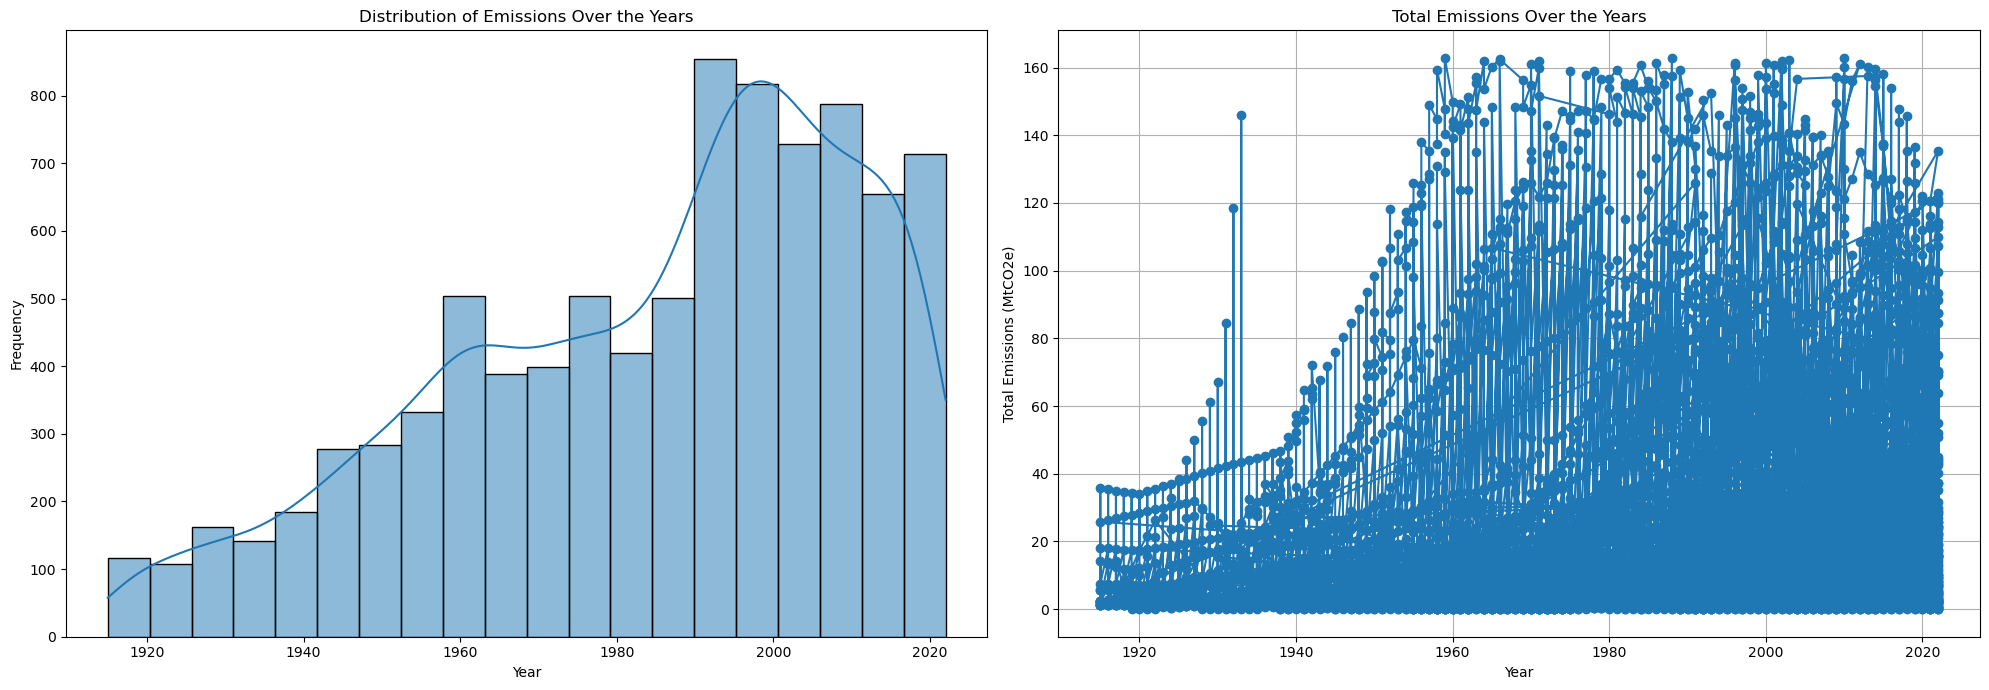

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# First subplot: Histogram with KDE of 'year'
sns.histplot(df['year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Emissions Over the Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Second subplot: Line plot of 'total_emissions_MtCO2e' over 'year'
axes[1].plot(df['year'], df['total_emissions_MtCO2e'], marker='o', linestyle='-')
axes[1].set_title('Total Emissions Over the Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Emissions (MtCO2e)')
axes[1].grid(True)

# Adjust layout and display the combined plot
plt.tight_layout()
plt.show()



The line plot shows a clear upward trend in total emissions (MtCO2e) from the early 1900s to 2020.

Pre-1940s: Emissions were relatively low and infrequent.

1940s to 1980s: There was a steady increase in emissions, indicating industrial growth.

1980s to 2020: Emissions continued to rise significantly, with higher and more frequent spikes, reflecting rapid industrialization and economic growth globally.

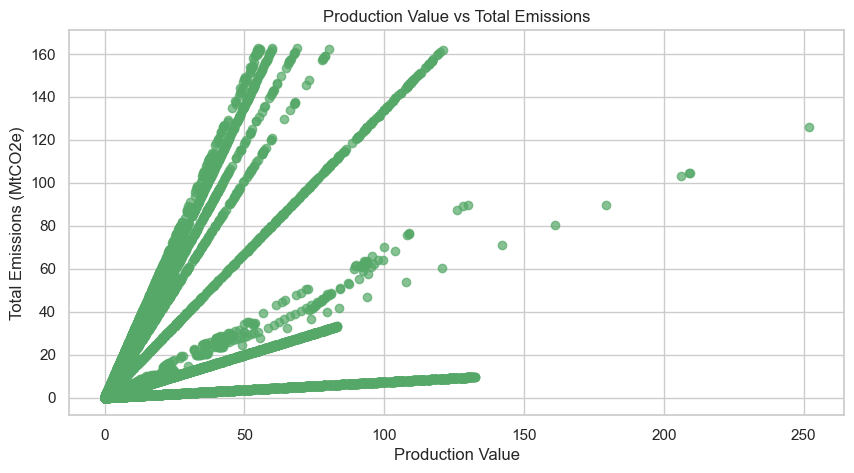

In [33]:


# Set up the figure size
plt.figure(figsize=(10, 5))

# Create a scatter plot
plt.scatter(df['production_value'], df['total_emissions_MtCO2e'], alpha=0.7, color='g')

# Set the title and labels
plt.title('Production Value vs Total Emissions')
plt.xlabel('Production Value')
plt.ylabel('Total Emissions (MtCO2e)')

# Show the plot
plt.show()


Positive Correlation: The scatter plot suggests a positive correlation between production value and total emissions, implying that as production increases, emissions also tend to increase.
    
Emission Variability: The variability in total emissions grows with higher production values, indicating that some production activities are more emission-intensive than others.
    
Clusters: The vertical clustering at specific production values may indicate consistent production levels across multiple observations, possibly due to standardized production processes or reporting practices.
    
High Emission Outliers: The presence of high emission outliers emphasizes the need to manage and reduce emissions, especially for high-capacity production units.

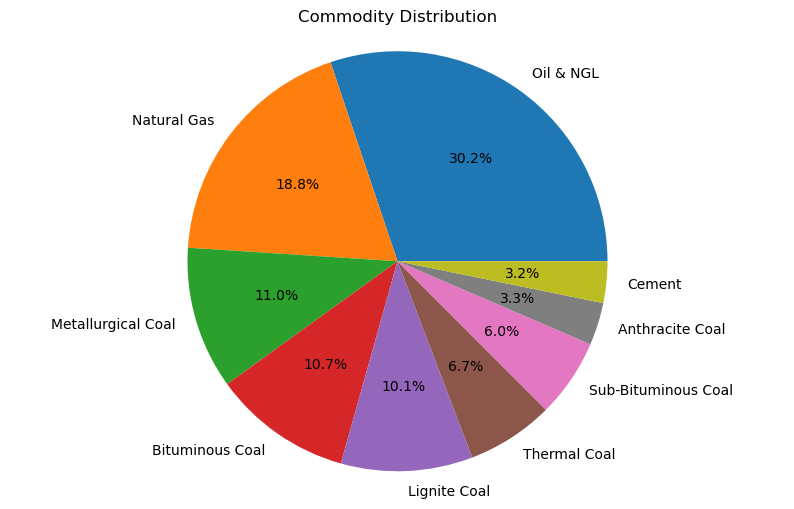

In [15]:

commodity_counts = df['commodity'].value_counts()  # Count occurrences of each commodity

plt.figure(figsize=(10, 6))  # Set the size of the figure (width=10 inches, height=6 inches)

# Create a pie chart with the counts of each commodity
plt.pie(commodity_counts, labels=commodity_counts.index, autopct='%1.1f%%')

plt.title('Commodity Distribution')  # Set the title of the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()  # Display the plot


Oil & NGL: Represents the largest share at 30.2% of the total commodity distribution.
    
Natural Gas: Accounts for 18.8%, making it the second largest commodity.
    
Metallurgical Coal: Holds 11.0% of the distribution.
    
Bituminous Coal: Comprises 10.7% of the commodities.
    
Lignite Coal: Makes up 10.1% of the distribution.
    
Other Commodities: Include Thermal Coal, Sub-Bituminous Coal, Anthracite Coal, and Cement, each with smaller shares ranging from 3.2% to 6.7%.
Overall, the chart highlights that Oil & NGL and Natural Gas are the predominant commodities in the distribution.

In [16]:
df["flaring_emissions_MtCO2"].max()

0.4928518629592435

In [17]:
df["venting_emissions_MtCO2"].max()

0.2019131498439193

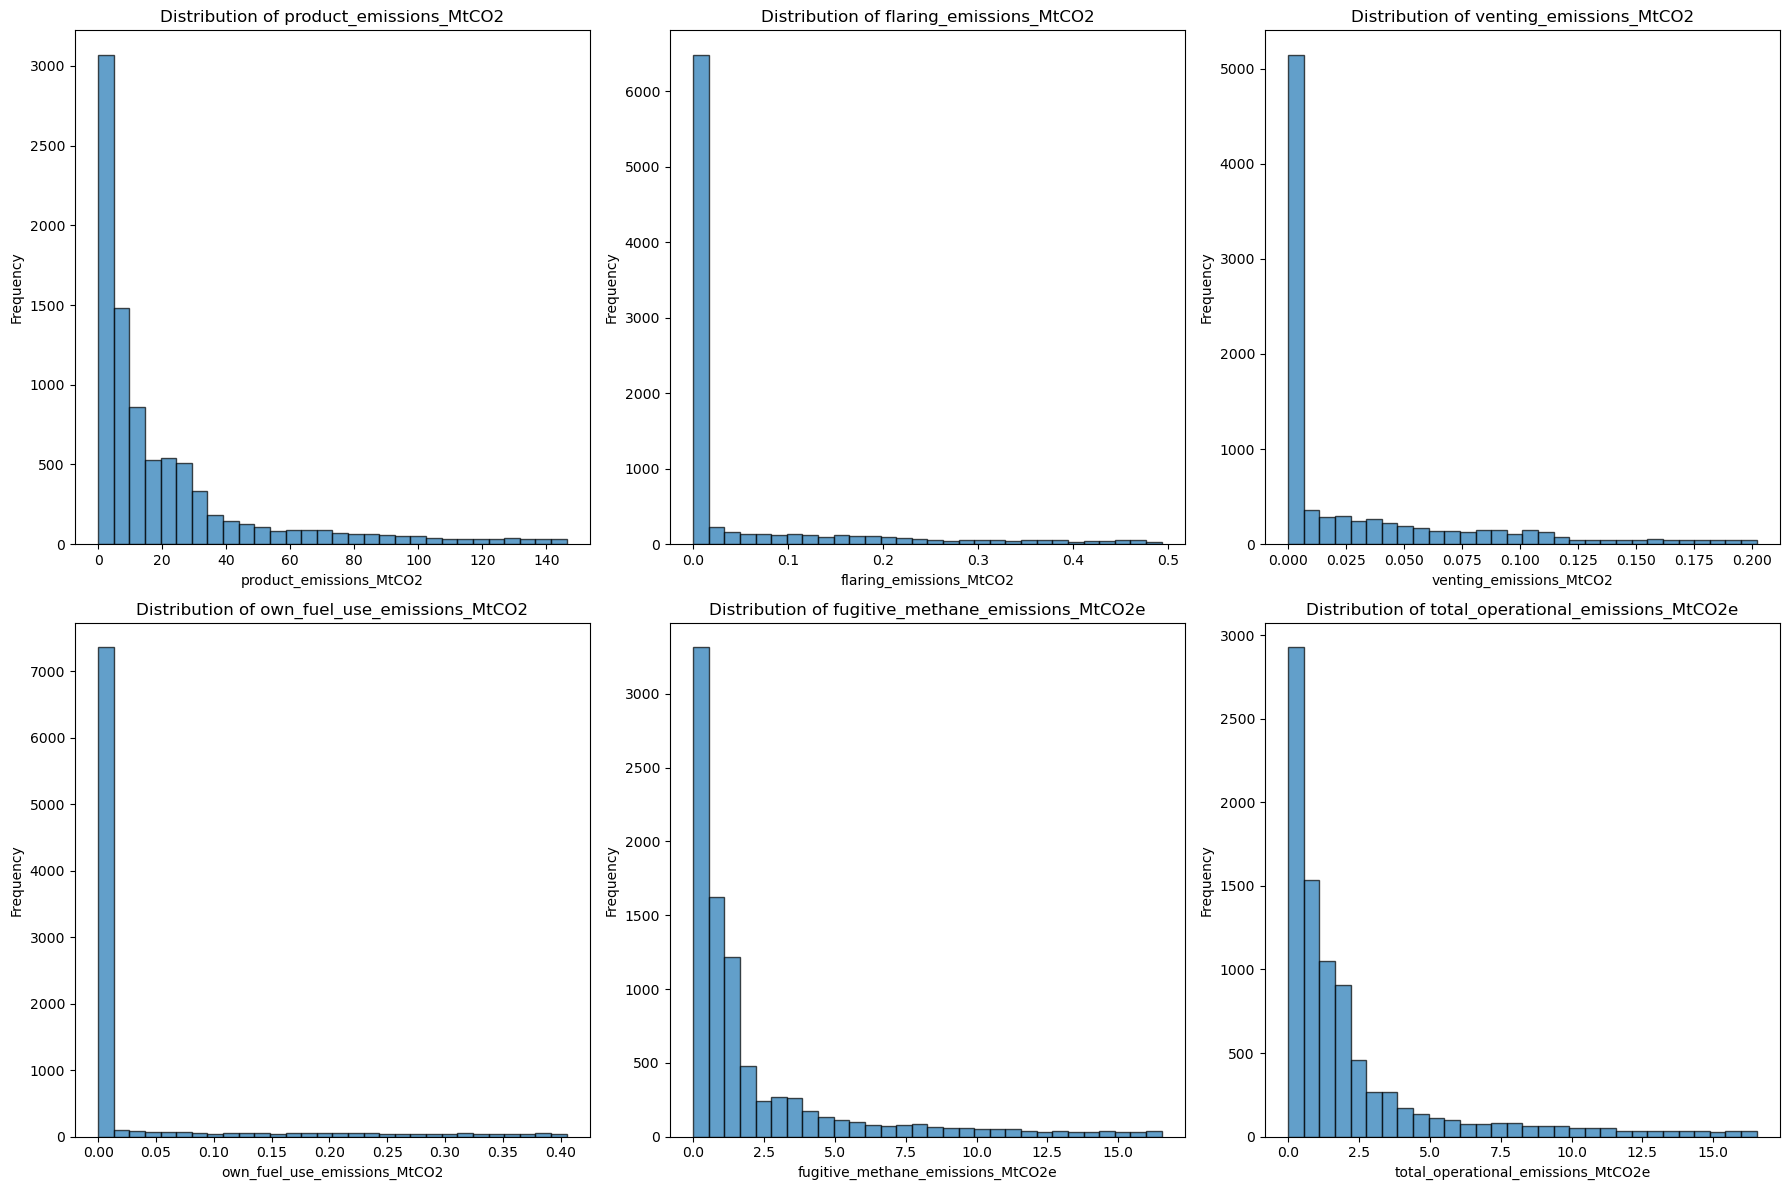

In [18]:
# Histograms for Emission Types in Subplots
emissions_columns = ['product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 
                     'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e', 'total_operational_emissions_MtCO2e']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(emissions_columns):
    axes[i].hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Key Observations from Emission Types Distributions

Product Emissions (MtCO2)
Distribution: Predominantly between 0 and 20 MtCO2, with a few outliers extending up to 140 MtCO2.
Impact: Directly increases the carbon footprint, contributing significantly to greenhouse gas emissions.

Flaring Emissions (MtCO2)
Distribution: Mainly concentrated around 0 MtCO2, with very few values exceeding 0.1 MtCO2.
Impact: Flaring results in the release of CO2 and other pollutants, contributing to air pollution and climate change.

Venting Emissions (MtCO2)
Distribution: Mostly close to 0 MtCO2, with rare occurrences above 0.05 MtCO2.
Impact: Venting releases methane, a potent greenhouse gas, directly into the atmosphere, exacerbating global warming.

Own Fuel Use Emissions (MtCO2)
Distribution: Almost all values are near 0 MtCO2, indicating minimal emissions from own fuel use.
Impact: Low emissions suggest good energy efficiency, but there's always room for improvement to achieve near-zero emissions.

Fugitive Methane Emissions (MtCO2e)
Distribution: Most values are below 2.5 MtCO2e, with some extending up to 15 MtCO2e.
Impact: Fugitive emissions are significant due to methane’s high global warming potential, leading to a notable impact on climate change
.
Total Operational Emissions (MtCO2e)
Distribution: Skewed towards lower values, with most emissions below 2.5 MtCO2e and some reaching up to 15 MtCO2e.
Impact: Represents the overall carbon footprint of operations, encompassing all emission sources.

Overall, the histograms reveal that emissions are generally low for most types, with a few high-emission outliers.

In [19]:
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols.head()

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
0,1962,0.9125,0.338928,0.005404,0.001299,0.0,0.018254,0.000652,0.024957,0.363885
1,1963,1.8250,0.677855,0.010808,0.002598,0.0,0.036508,0.001304,0.049914,0.727770
2,1964,7.3000,2.711422,0.043233,0.010392,0.0,0.146033,0.005215,0.199657,2.911079
3,1965,10.9500,4.067132,0.064849,0.015588,0.0,0.219049,0.007823,0.299486,4.366618
4,1966,13.5050,5.016130,0.079980,0.019225,0.0,0.270160,0.009649,0.369366,5.385495


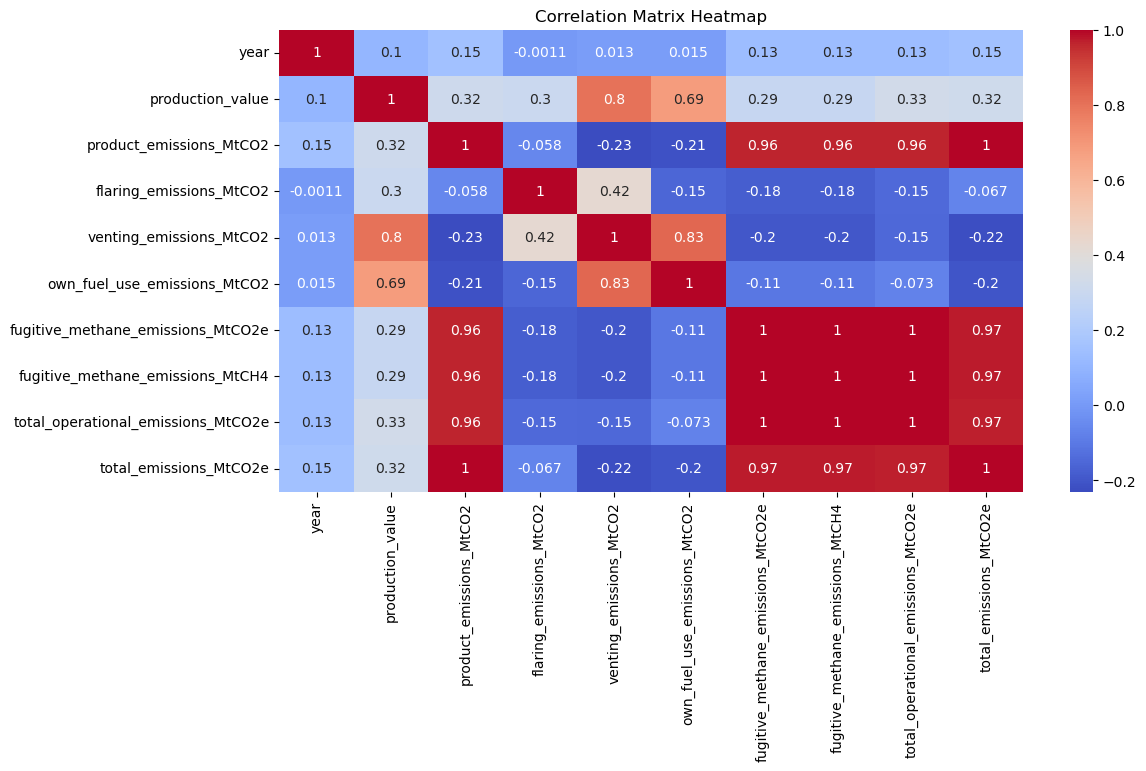

In [20]:
# plotting a heat map
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

Valuable Insights from the Correlation Matrix Heatmap
1. High Correlation:
Product Emissions and Fugitive Methane Emissions: The correlation between product_emissions_MtCO2 and fugitive_methane_emissions_MtCH4 is extremely high (0.96), indicating that as product emissions increase, fugitive methane emissions also increase.

Fugitive Methane Emissions and Fugitive Methane Emissions (CO2e): There is a perfect correlation (1.00) between fugitive_methane_emissions_MtCH4 and fugitive_methane_emissions_MtCO2e, which is expected since these metrics likely measure the same phenomenon in different units or contexts.

Fugitive Methane Emissions (CO2e) and Total Operational Emissions (CO2e): Another perfect correlation (1.00), suggesting that fugitive methane emissions are a significant component of total operational emissions.

2. Moderate Correlation:
Production Value and Venting Emissions: The correlation between production_value and venting_emissions_MtCO2 is moderately high (0.8), implying that higher production values are associated with higher venting emissions.

Production Value and Own Fuel Use Emissions: There is a notable correlation (0.69) between production_value and own_fuel_use_emissions_MtCO2, suggesting that as production increases, emissions from own fuel use also increase.

3. Low or Negative Correlation:
Flaring Emissions and Product Emissions: A weak negative correlation (-0.058) between flaring_emissions_MtCO2 and product_emissions_MtCO2, indicating that these emissions types do not have a significant linear relationship.

Venting Emissions and Total Emissions: The correlation between venting_emissions_MtCO2 and total_emissions_MtCO2e is low (-0.22), suggesting that venting emissions do not strongly predict total emissions.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8876 entries, 0 to 15749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                8876 non-null   int64  
 1   parent_entity                       8876 non-null   object 
 2   parent_type                         8876 non-null   object 
 3   reporting_entity                    8876 non-null   object 
 4   commodity                           8876 non-null   object 
 5   production_value                    8876 non-null   float64
 6   production_unit                     8876 non-null   object 
 7   product_emissions_MtCO2             8876 non-null   float64
 8   flaring_emissions_MtCO2             8876 non-null   float64
 9   venting_emissions_MtCO2             8876 non-null   float64
 10  own_fuel_use_emissions_MtCO2        8876 non-null   float64
 11  fugitive_methane_emissions_MtCO2e   8876 non-nu

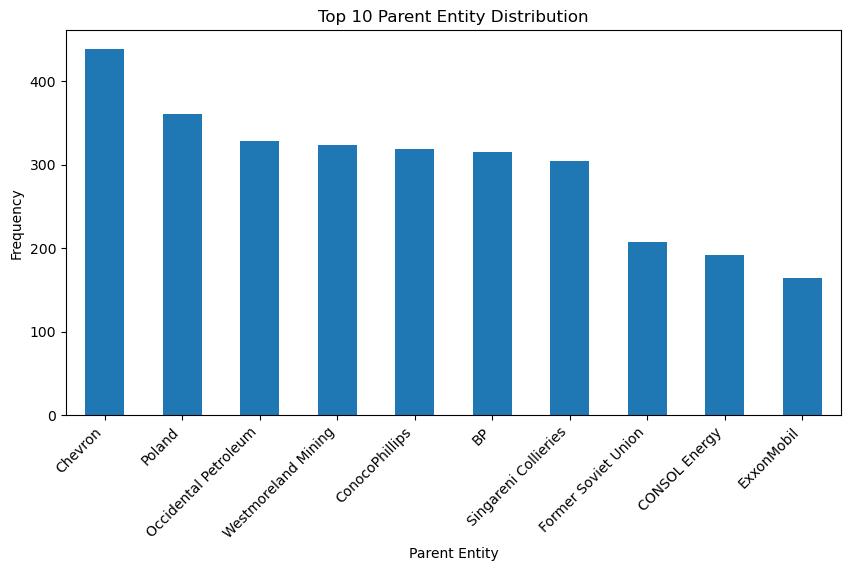

In [22]:
import matplotlib.pyplot as plt

# Bar Plot for Parent Entity Distribution
parent_entity_counts = df['parent_entity'].value_counts().head(10)  # Top 10 entities
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the bar chart
parent_entity_counts.plot(kind='bar')

# Title and labels
ax.set_title('Top 10 Parent Entity Distribution')
ax.set_xlabel('Parent Entity')
ax.set_ylabel('Frequency')

# Adjust x-axis labels
ax.set_xticklabels(parent_entity_counts.index, rotation=45, ha='right', fontsize=10)

plt.show()


The bar plot displays the distribution of the top 10 parent entities based on frequency. Here are the key observations:

Chevron: Has the highest frequency among the parent entities, indicating it is the most prominent entity in the dataset.
    
Poland, Occidental Petroleum, Westmoreland Mining, Conocophillips, BP, Singareni Collieries: These entities have similar frequencies, showcasing their significant presence.

Former Soviet Union, CONSOL Energy, ExxonMobil: These entities have relatively lower frequencies compared to the others but are still among the top 10.
    
Overall, Chevron stands out as the most frequent parent entity, followed by a mix of international and national corporations.

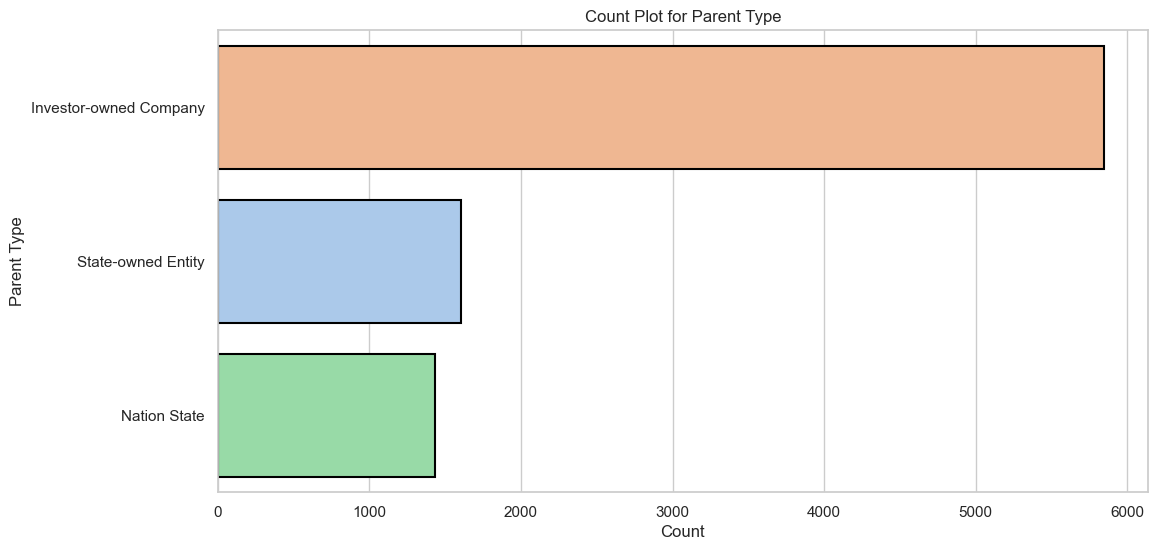

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='parent_type', data=df, order=df['parent_type'].value_counts().index,hue = "parent_type",palette='pastel',
              linewidth=1.5, 
              edgecolor='black',
              saturation=0.75)
plt.bar_width = 0.5
plt.title('Count Plot for Parent Type')
plt.xlabel('Count')
plt.ylabel('Parent Type')
plt.show()


The count plot displays the distribution of different parent types in the dataset. Here are the key observations:

Investor-owned Company: This is the most common parent type, with a significantly higher count compared to other types.

State-owned Entity: The second most common parent type, though with considerably fewer instances than investor-owned companies.

Nation State: The least common parent type among the three, with the lowest count.

Overall, the plot highlights that investor-owned companies dominate the dataset, followed by state-owned entities and nation states.

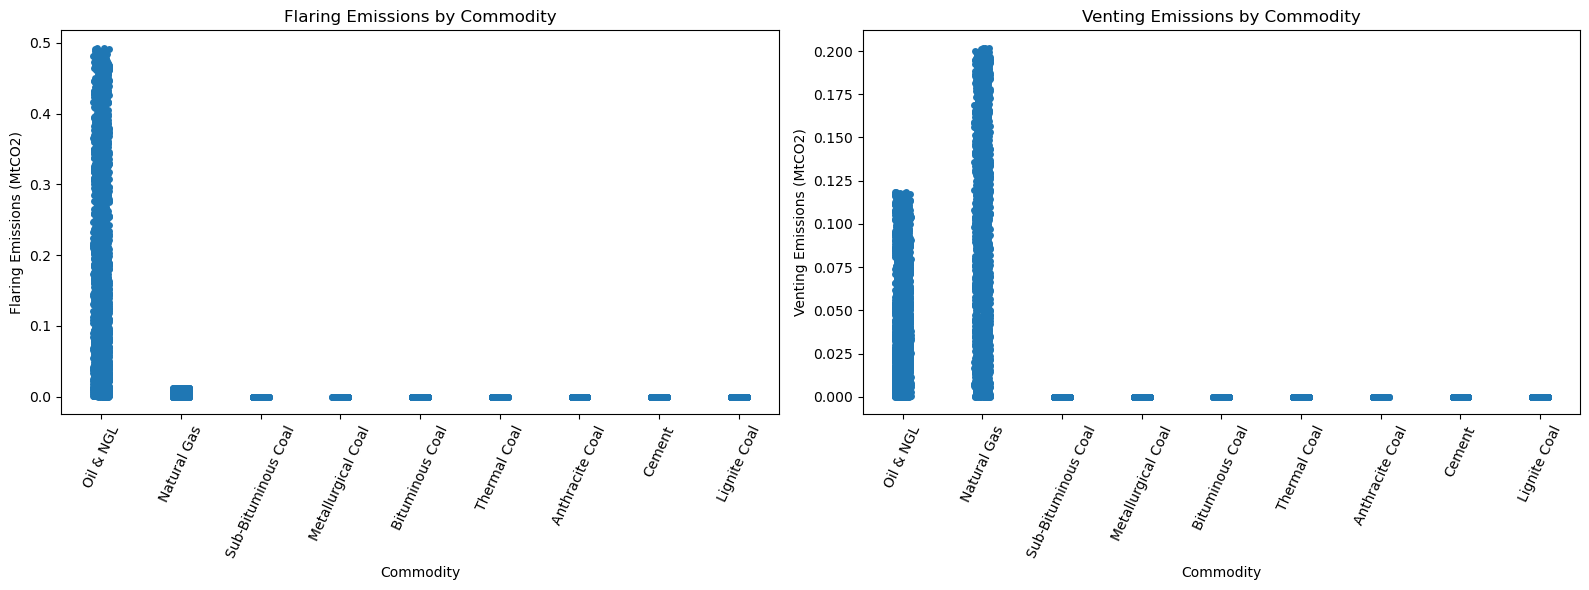

In [24]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Strip plot for flaring emissions
sns.stripplot(x='commodity', y='flaring_emissions_MtCO2', data=df, ax=axs[0])
axs[0].set_title('Flaring Emissions by Commodity')
axs[0].set_xlabel('Commodity')
axs[0].set_ylabel('Flaring Emissions (MtCO2)')
axs[0].tick_params(axis='x', rotation=65)

# Strip plot for venting emissions
sns.stripplot(x='commodity', y='venting_emissions_MtCO2', data=df, ax=axs[1])
axs[1].set_title('Venting Emissions by Commodity')
axs[1].set_xlabel('Commodity')
axs[1].set_ylabel('Venting Emissions (MtCO2)')
axs[1].tick_params(axis='x', rotation=65)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The strip plot displays the distribution of flaring emissions (MtCO2) and venting emissions (MtCO2) by different commodities. 
Here are the key observations:

Oil & NGL: This commodity has the highest flaring emissions, with values ranging from 0 to 0.5 MtCO2, and moderate venting emissions, with values ranging from 0 to 0.125 MtCO2. The data points are densely packed, indicating frequent flaring emissions and notable venting emissions in this category.

Natural Gas: This commodity shows flaring emissions close to 0 MtCO2 but reaches a peak of 0.2 MtCO2 in venting emissions, which is the highest among all commodities.

Other Commodities: Sub-Bituminous Coal, Metallurgical Coal, Bituminous Coal, Thermal Coal, Anthracite Coal, Cement, and Lignite Coal all have minimal to no flaring and venting emissions, with values clustered around 0 MtCO2.

Overall, the plot highlights that Oil & NGL predominate in flaring emissions, while Natural Gas predominates in venting emissions, followed by a notable impact from Oil & NGL. Other commodities contribute negligibly to both flaring and venting emissions.



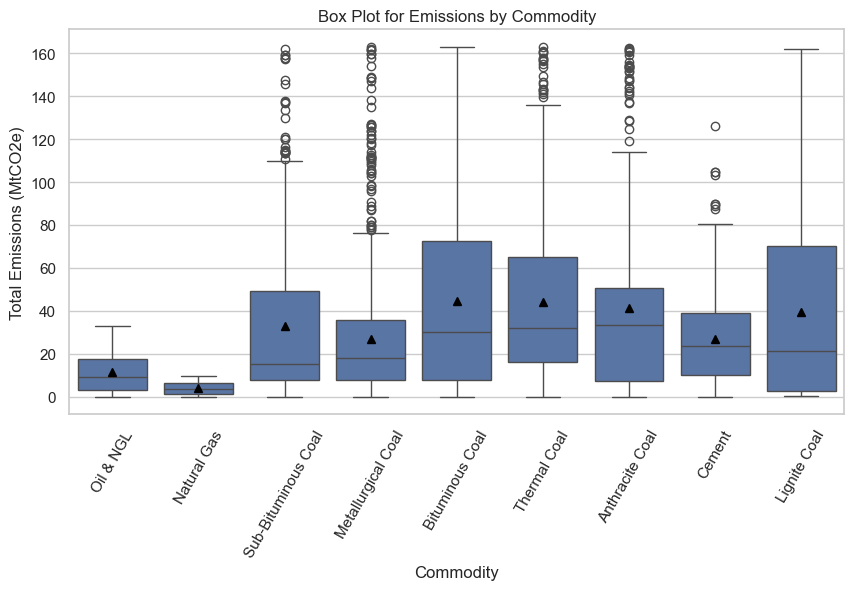

In [46]:
plt.figure(figsize=(10, 5))
# use to set style of background of plot
sns.set(style="whitegrid")
 
sns.boxplot(x='commodity', y='total_emissions_MtCO2e', data=df,showmeans=True, meanprops={"marker": "^", "markerfacecolor": "black", "markeredgecolor": "black"})

plt.title('Box Plot for Emissions by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=60)
plt.show()

Predominant Emissions: Coal-related commodities, especially Sub-Bituminous Coal, Bituminous Coal, and Lignite Coal, show the highest emissions with a wide range and many outliers, indicating significant and variable emissions.
    
Moderate Emissions: Metallurgical Coal, Thermal Coal, and Anthracite Coal also have considerable emissions but generally lower than the highest-emitting categories.
    
Lower Emissions: Oil & NGL, Natural Gas, and Cement have lower and more consistent emissions compared to coal commodities.
    
Overall, the plot highlights that coal-related commodities are the predominant contributors to emissions, with significant variability and occasional very high emissions. In contrast, Oil & NGL, Natural Gas, and Cement have relatively minimal impact on total emissions.








C:\Users\UMA SHAW\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\UMA SHAW\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


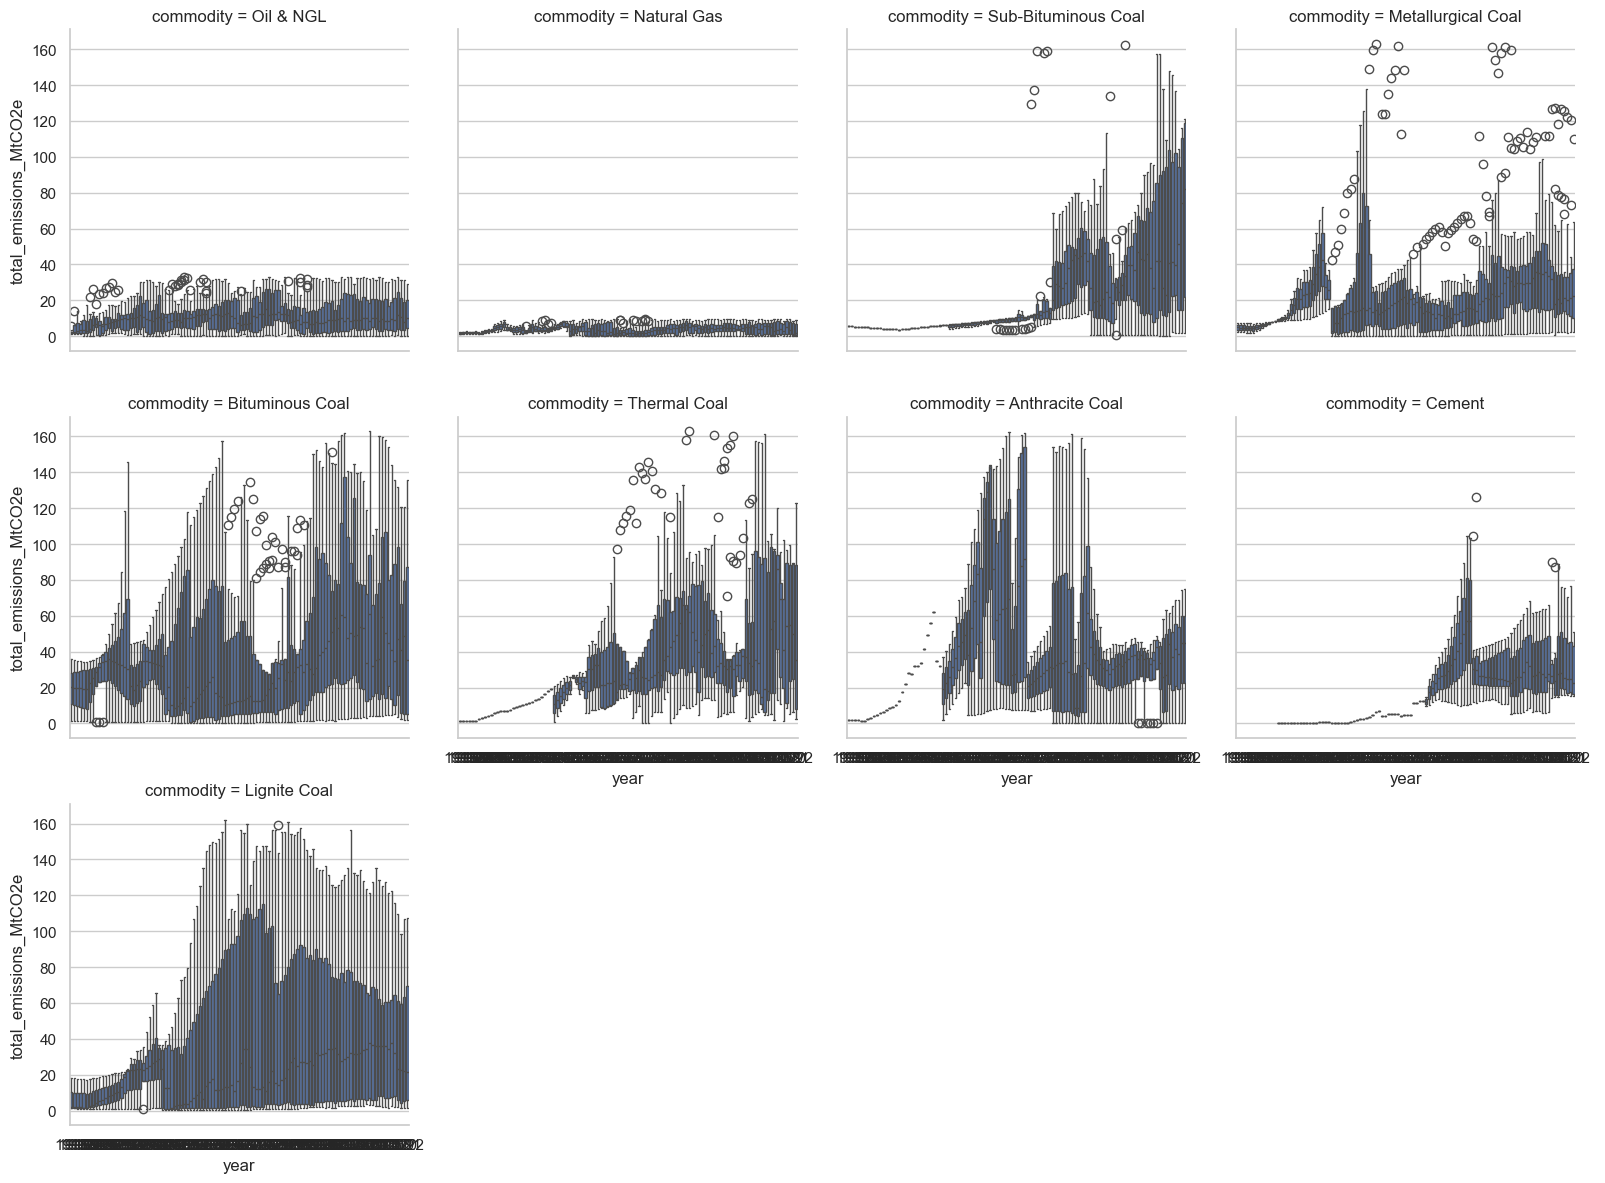

In [26]:
# Facet Grid for Emissions by Year and Commodity
g = sns.FacetGrid(df, col='commodity', col_wrap=4, height=4)
g.map(sns.boxplot, 'year', 'total_emissions_MtCO2e')
g.add_legend()
plt.show()

Oil & NGL: Shows relatively consistent emissions over the years, with some variability but generally lower compared to coal commodities.
Natural Gas: Exhibits low emissions with little variation over the years.
    
Sub-Bituminous Coal, Metallurgical Coal, Bituminous Coal, Thermal Coal, Anthracite Coal, Lignite Coal: These coal commodities display significant variability in emissions, with noticeable increases in certain periods. The emissions for these commodities are generally higher and show distinct peaks.
    
Cement: Has moderate emissions with some variability over the years.
    
Overall, the plot highlights that coal commodities have the highest and most variable emissions, while oil & NGL and natural gas have relatively lower and more consistent emissions.